1. Import the dataset into a Pandas DataFrame and do feature engineering.
(a) Print the number of instances/samples in the DataFrame.
(b) Print the total number of features in the DataFrame.
(c) Print the total number of missing instances in the DataFrame.
(d) Perform feature engineering to convert the Date/Time into other categorical features
(e.g., year, month, day) and numerical value of time. See ‘import datetime’.

In [1]:
import pandas as pd
df = pd.read_csv('WindDataset.csv')

In [2]:
print("1b. Number of Samples: ",len(df))
print("1c. Number of Features: ", len(df.columns))
print("1d. Number of Missing Instances: ", df.isna().sum().sum())

# Dropped the missing values
df = df.dropna()
df = df[pd.to_numeric(df['MeasuredPower']) >= 0]

1b. Number of Samples:  50530
1c. Number of Features:  5
1d. Number of Missing Instances:  3


In [3]:
print("1d. Converted DateTime into other categorical features:")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
print(df.head(5))

1d. Converted DateTime into other categorical features:
             DateTime  MeasuredPower  WindSpeed  TheoreticalPower  \
0 2018-01-01 00:00:00     380.047791   5.311336        416.328908   
1 2018-01-01 00:10:00     453.769196   5.672167        519.917511   
2 2018-01-01 00:20:00     306.376587   5.216037        390.900016   
3 2018-01-01 00:30:00     419.645904   5.659674        516.127569   
4 2018-01-01 00:40:00     380.650696   5.577941        491.702972   

   WindDirection  Year  Month  Day  Hour  Minute  Second  
0     259.994904  2018      1    1     0       0       0  
1     268.641113  2018      1    1     0      10       0  
2     272.564789  2018      1    1     0      20       0  
3     271.258087  2018      1    1     0      30       0  
4     265.674286  2018      1    1     0      40       0  


2. Pair Plot of Data:
The pairplot helps to visualize how feature 1 and feature 2 are related to one another. 
 For example Measured Power and Wind Speed shows a graph that at a certain wind speed, the measure power does not get any larger


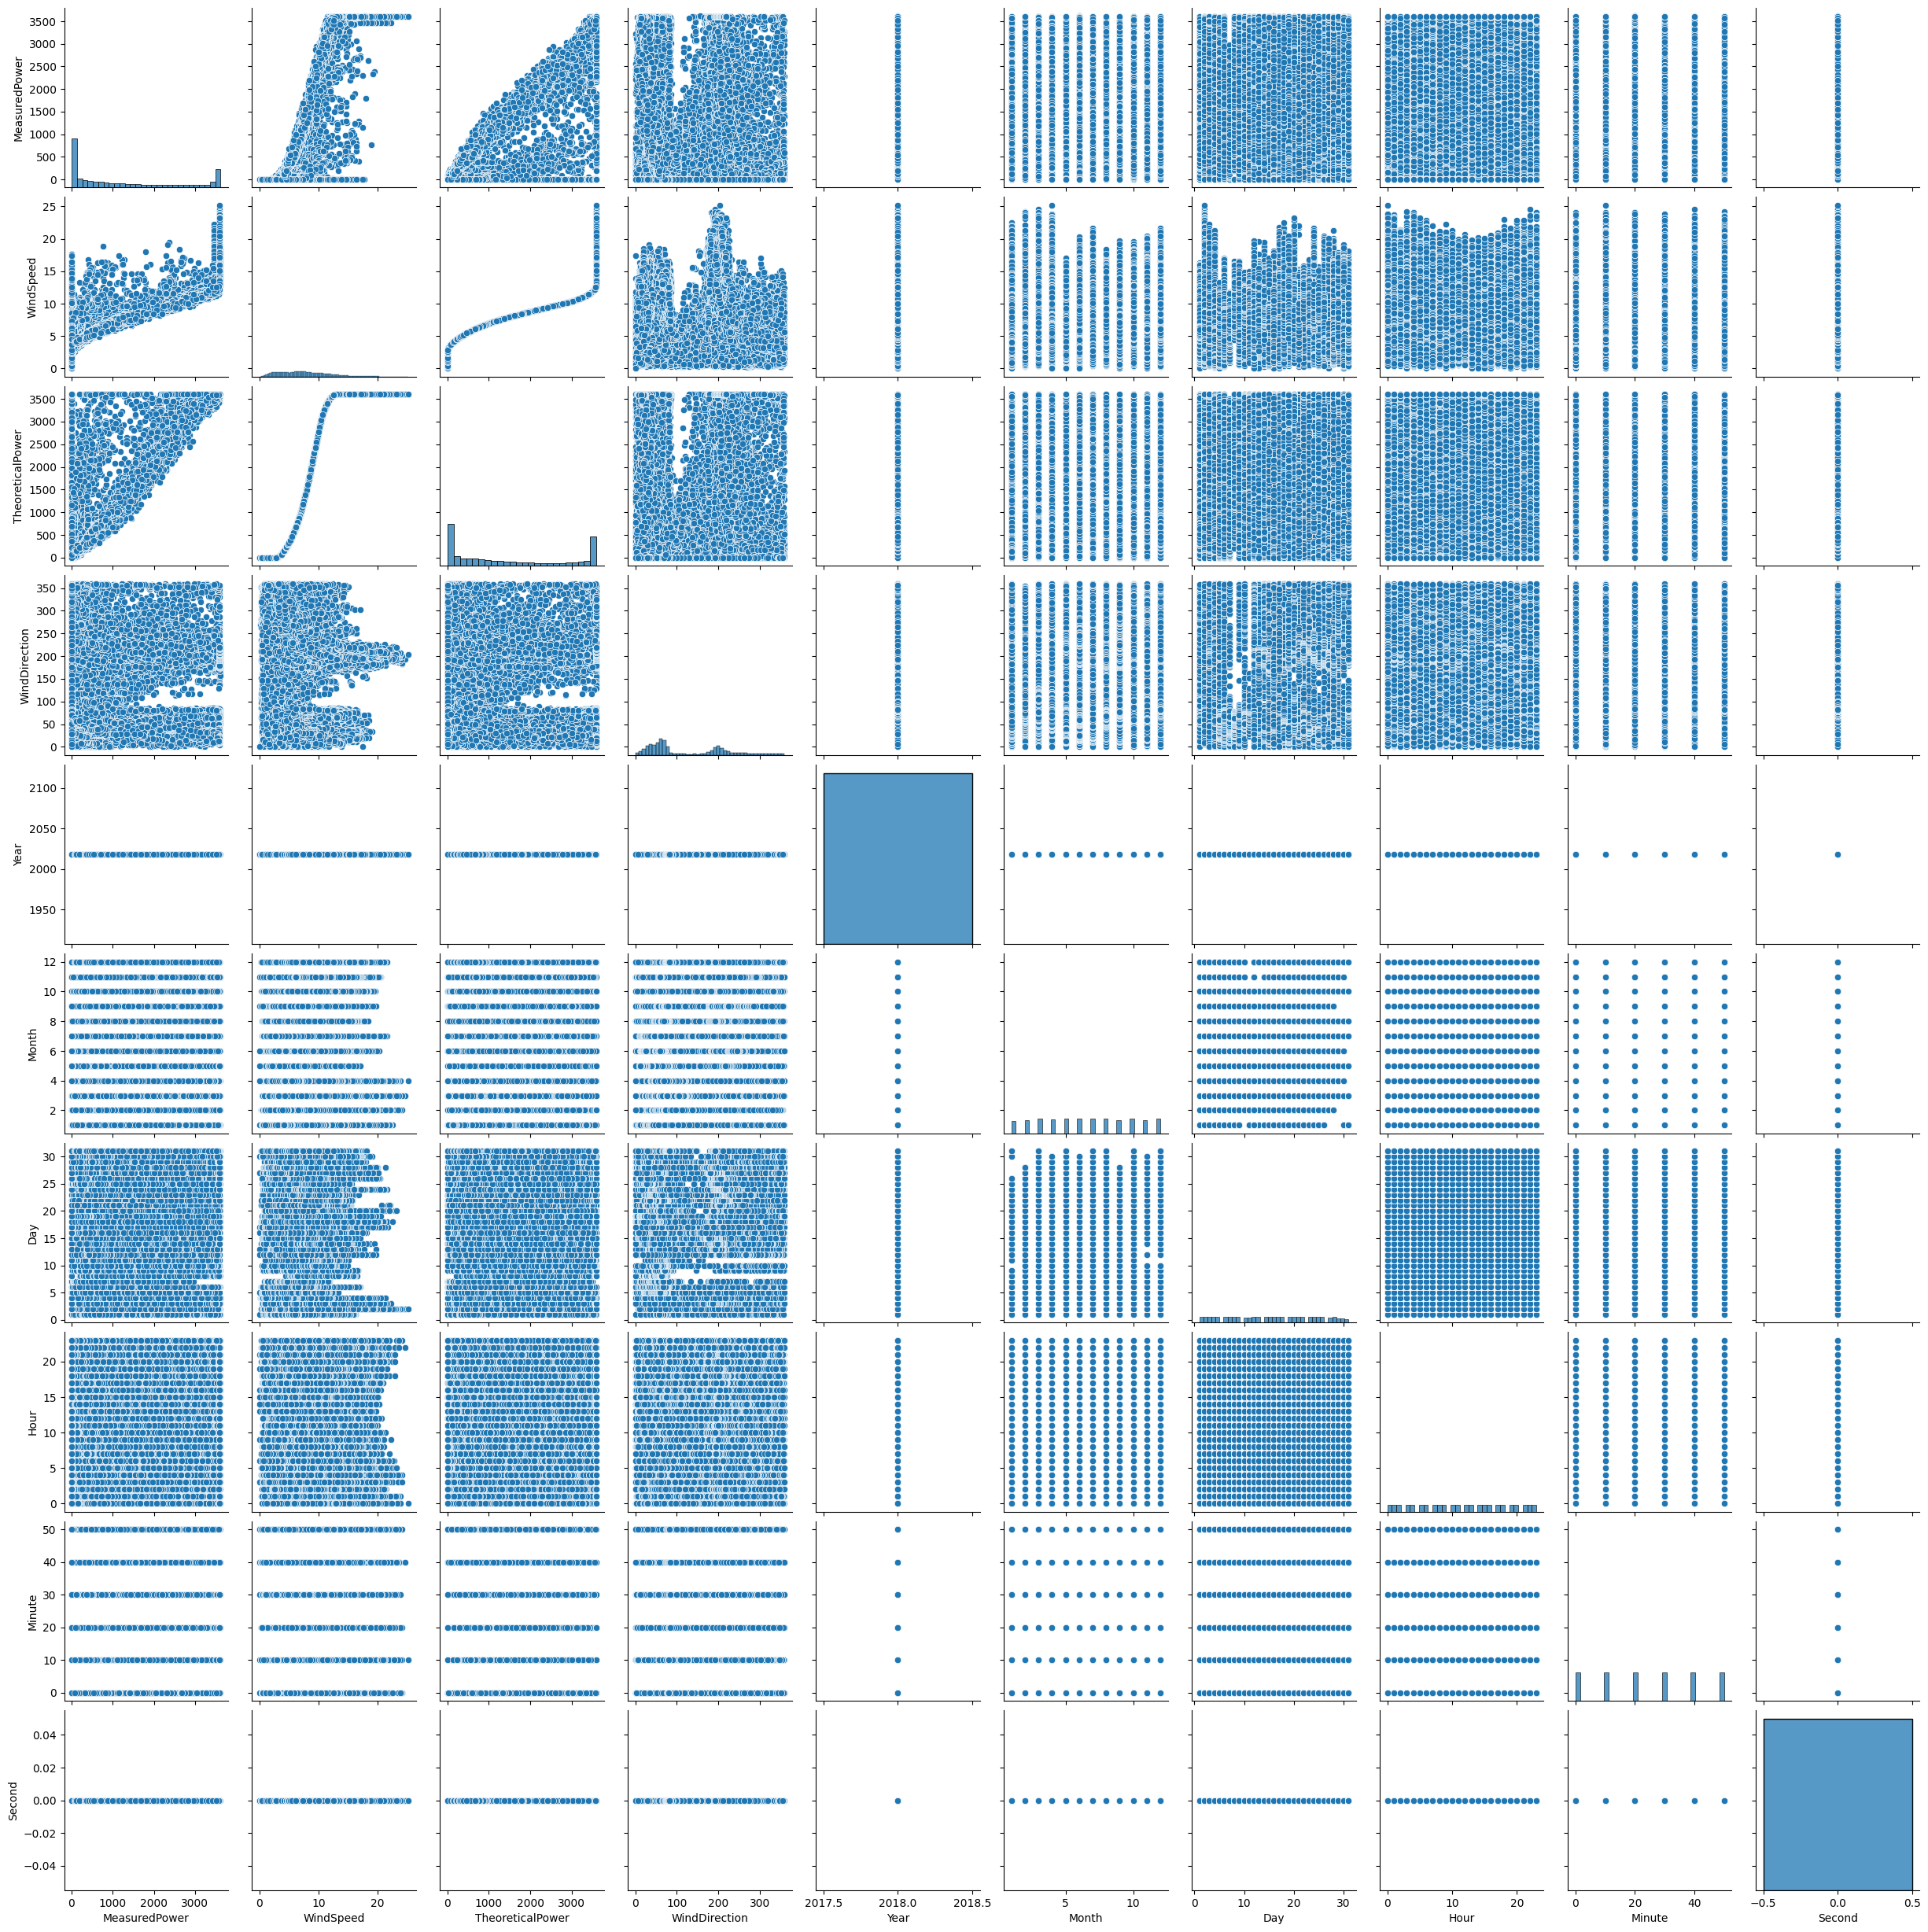

In [4]:
import seaborn as sns
print("2. Pair Plot of Data:")
print("The pairplot helps to visualize how feature 1 and feature 2 are related to one another. \n For example Measured Power and Wind Speed shows a graph that at a certain wind speed, the measure power does not get any larger")
sns.pairplot(df)

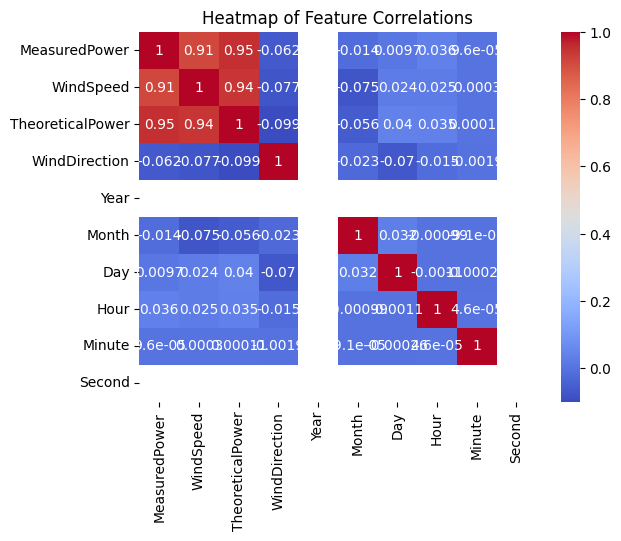

The heatmap shows linear correlations between 2 features. While month and measured power don't look correlated, they can still be since it only shows linearly correlated features. As expected, wind speed and measure power have a high correlation


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()
print("The heatmap shows linear correlations between 2 features. While month and measured power don't look correlated, they can still be since it only shows linearly correlated features. As expected, wind speed and measure power have a high correlation")

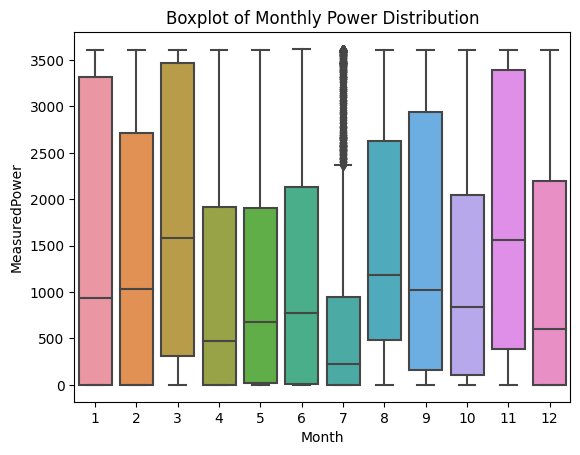

This boxplot shows the non linear correlation between the month and measured power. From the graph you can see that the first half, the measure power goes down, and then around July it starts increasing again. This could happen for many reasons such as change in wind patterns or temperature.


In [6]:
sns.boxplot(x='Month', y='MeasuredPower', data=df)
plt.title("Boxplot of Monthly Power Distribution")
plt.show()
print("This boxplot shows the non linear correlation between the month and measured power. From the graph you can see that the first half, the measure power goes down, and then around July it starts increasing again. This could happen for many reasons such as change in wind patterns or temperature.")

3. Is there any difference between the months for average power production? Which month has
the highest average power production, and which has the lowest? (Hint: Pandas can group by
columns and report means. See pandas.DataFrame.group_by or pandas.DataFrame.pivot_table)

In [7]:
print("Based on the boxplot from question 2, you can see that there is a difference between the month and its average power production.")
print("It is very close but March has the highest average power production while ")

Based on the boxplot from question 2, you can see that there is a difference between the month and its average power production.
It is very close but March has the highest average power production while 


In [8]:
print("4: Features Pearson Correlation")
corr = df.corr(method='pearson')
print(corr)
print("Since Pearson Correlation measures the linear relation between the two features in the grid,")
print("we can see that features like MeasuredPower, WindSpeed, and TheoreticalPower are positively linearly")
print("correlated, as can be seen by their Pearson Correlation values being close to one.")
print("All other features aren't very linearly correlated with any of the others, as the magnitude of their correlation values are less than 0.1")

4: Features Pearson Correlation
                  MeasuredPower  WindSpeed  TheoreticalPower  WindDirection  \
MeasuredPower          1.000000   0.912678          0.949859      -0.062388   
WindSpeed              0.912678   1.000000          0.944137      -0.076809   
TheoreticalPower       0.949859   0.944137          1.000000      -0.098763   
WindDirection         -0.062388  -0.076809         -0.098763       1.000000   
Year                        NaN        NaN               NaN            NaN   
Month                 -0.013709  -0.075401         -0.056078      -0.022917   
Day                    0.009664   0.023656          0.040171      -0.069619   
Hour                   0.036350   0.024709          0.034614      -0.015209   
Minute                 0.000096   0.000304          0.000114      -0.001938   
Second                      NaN        NaN               NaN            NaN   

                  Year     Month       Day      Hour    Minute  Second  
MeasuredPower      NaN -0

In [9]:
print("5: Maximum Wind Speed")
max_wind_speed = df['WindSpeed'].max()
max_wind_speed_direction = df.loc[df['WindSpeed'] == max_wind_speed, 'WindDirection'].values[0]
print("The maximum wind speed is",max_wind_speed)
print("The direction of the wind that resulted in the maximum wind speed is",max_wind_speed_direction,"degrees")

5: Maximum Wind Speed
The maximum wind speed is 25.20601082
The direction of the wind that resulted in the maximum wind speed is 202.9701996 degrees


In [10]:
print("6: Minimum Wind Speed")
min_wind_speed = df['WindSpeed'].min()
min_wind_speed_year = df.loc[df['WindSpeed'] == min_wind_speed, 'Year'].values[0]
min_wind_speed_month = df.loc[df['WindSpeed'] == min_wind_speed, 'Month'].values[0]
min_wind_speed_day = df.loc[df['WindSpeed'] == min_wind_speed, 'Day'].values[0]
min_wind_speed_hour = df.loc[df['WindSpeed'] == min_wind_speed, 'Hour'].values[0]
min_wind_speed_minute = df.loc[df['WindSpeed'] == min_wind_speed, 'Minute'].values[0]

print("The minimum wind speed is",min_wind_speed)
print("The minimum wind speed occurred at {}:{} on {}-{}-{}".format(min_wind_speed_hour,min_wind_speed_minute,min_wind_speed_day,min_wind_speed_month,min_wind_speed_year))

6: Minimum Wind Speed
The minimum wind speed is 0.0
The minimum wind speed occurred at 9:50 on 1-11-2018


7. Does the manufacturer’s theoretical power production curve fit well with the real power
production?
(a) Plot the theoretical power (TheoreticalPower) and real power (MeasuredPower) vs.
windspeed
(b) Based on (a) it should be evident that there are outliers in the real production of
power. Remove the outlier data at wind speed > 2.5 m/s and zero power production. (Otherwise,
it will be hard to train an accurate model in Part 8).

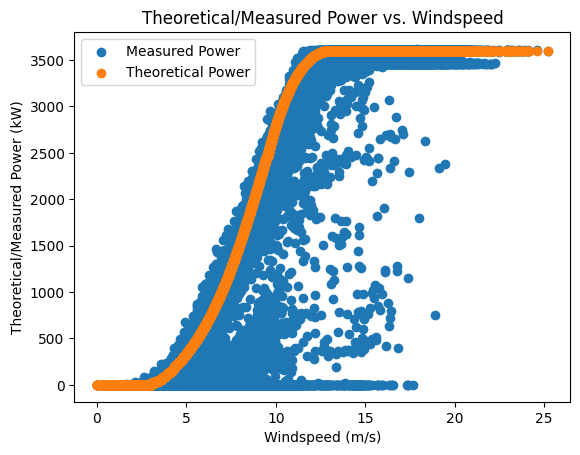

In [11]:

# Create a scatter plot of measured power vs. windspeed
plt.scatter(df["WindSpeed"], df["MeasuredPower"], label='Measured Power')

plt.scatter(df["WindSpeed"], df["TheoreticalPower"], label='Theoretical Power')



# Add labels and legend
plt.xlabel("Windspeed (m/s)")
plt.ylabel("Theoretical/Measured Power (kW)")
plt.title("Theoretical/Measured Power vs. Windspeed")
plt.legend()

# Show the plot
plt.show()

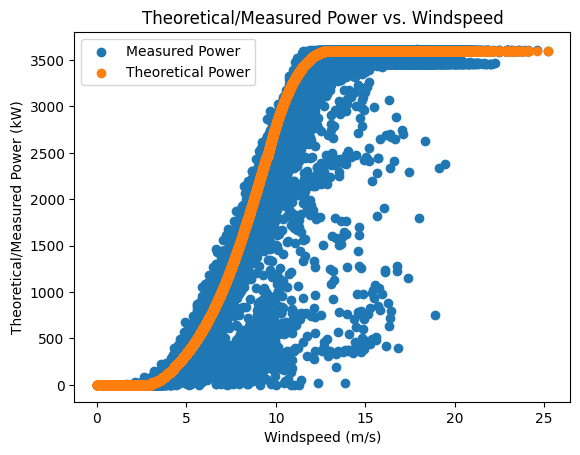

In [12]:
df = df.loc[(df["WindSpeed"] <= 2.5) | (df["MeasuredPower"] != 0)]
# Create a scatter plot of measured power vs. windspeed
plt.scatter(df["WindSpeed"], df["MeasuredPower"], label='Measured Power')

plt.scatter(df["WindSpeed"], df["TheoreticalPower"], label='Theoretical Power')



# Add labels and legend
plt.xlabel("Windspeed (m/s)")
plt.ylabel("Theoretical/Measured Power (kW)")
plt.title("Theoretical/Measured Power vs. Windspeed")
plt.legend()

# Show the plot
plt.show()

In [13]:
df.head()
df = df.drop(["Year", "Minute", "Second"], axis=1)

8. Train and test two different machine learning models to predict real power (MeasuredPower)
using good data science practices. Note: don’t use TheoreticalPower as a feature.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.drop(["TheoreticalPower", "MeasuredPower", "DateTime"], axis=1)
y = df["MeasuredPower"]

Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
XtrainRFR, XtestRFR, ytrainRFR, ytestRFR = train_test_split(X, y, random_state=27, train_size=0.7)

(a) Justify your train/test split ratio and your ML model selection choice.

In [16]:
print("With the size of the data being over 50,000 data points, we believe a 70/30 train/test split should be sufficient")

With the size of the data being over 50,000 data points, we believe a 70/30 train/test split should be sufficient


(b) Use GridSearchCV to optimize the model hyperparameters. Justify your choices of
which hyperparameters to optimize.

In [17]:
params = {'n_estimators': [100, 150, 200, 250, 300, 350], 'max_depth': [17, 19, 21], 'min_samples_split': [2, 3, 5], "criterion": ["squared_error", "poisson"]}
#for criterion: absolute error takes too long and poisson doesn't allow negative values(may need to remove them)


rfr = GridSearchCV(RandomForestRegressor(random_state=27), params, n_jobs = -1, verbose = 4, cv=5)
rfr.fit(XtrainRFR, ytrainRFR)
print("Best hyperparameters: ", rfr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters:  {'criterion': 'squared_error', 'max_depth': 21, 'min_samples_split': 2, 'n_estimators': 350}


[testing lower values:

abs-error : 6m 50sec

sq-error : 5sec

friedman : 5sec

poisson : has negative values- cannot run

(c) Report the best_estimator_, best_score_ and best_params_ identified from GridSearchCV

In [18]:
y_predRFR = rfr.predict(XtestRFR)
print("The best estimator is:",rfr.best_estimator_)
print("The best score is:",rfr.best_score_)
print("The best parameters is:",rfr.best_params_)

The best estimator is: RandomForestRegressor(max_depth=21, n_estimators=350, random_state=27)
The best score is: 0.9843488672242804
The best parameters is: {'criterion': 'squared_error', 'max_depth': 21, 'min_samples_split': 2, 'n_estimators': 350}


(d) What is the Mean Absolute Error (MAE) and root-mean-square error (RMSE) on the
training and test sets for each model?

In [19]:

ypredTrainRFR = rfr.predict(XtrainRFR)
mae_train = mean_absolute_error(ytrainRFR, ypredTrainRFR)
rmse_train = mean_squared_error(ytrainRFR, ypredTrainRFR, squared=False)

# Compute MAE and RMSE on the test set
mae_test = mean_absolute_error(ytestRFR, y_predRFR)
rmse_test = mean_squared_error(ytestRFR, y_predRFR, squared=False)

# Print the results
print("Training set MAE:", mae_train)
print("Training set RMSE:", rmse_train)
print("Test set MAE:", mae_test)
print("Test set RMSE:", rmse_test)

Training set MAE: 24.93127001834704
Training set RMSE: 58.20590277118094
Test set MAE: 63.78510703253561
Test set RMSE: 151.74648963466169


Gradient Boosting Regressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
XtrainGBR, XtestGBR, ytrainGBR, ytestGBR = train_test_split(X, y, random_state=27, train_size=0.7)

(a) Justify your train/test split ratio and your ML model selection choice.

We chose the train/test split because it is pretty standard to use 70/30. This ratio ensures there is enough training data to actually train the model and enough test data to actually learn how well the model did.

(b) Use GridSearchCV to optimize the model hyperparameters. Justify your choices of
which hyperparameters to optimize.

In [21]:
parameters = {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 150, 250], 'subsample': [0.8, 0.3, 0.1], 'max_depth': [3, 4, 8]}

regressor = GradientBoostingRegressor()

gbr = GridSearchCV(regressor, param_grid = parameters, cv = 5, verbose = 4, n_jobs=-1)
gbr.fit(XtrainGBR, ytrainGBR)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 8],
                         'n_estimators': [100, 150, 250],
                         'subsample': [0.8, 0.3, 0.1]},
             verbose=4)

(c) Report the best_estimator_, best_score_ and best_params_ identified from GridSearchCV

In [22]:
y_predGBR = gbr.predict(XtestGBR)
print("The best estimator is:",gbr.best_estimator_)
print("The best score is:",gbr.best_score_)
print("The best parameters is:",gbr.best_params_)

The best estimator is: GradientBoostingRegressor(max_depth=8, n_estimators=250, subsample=0.8)
The best score is: 0.989132398271732
The best parameters is: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 250, 'subsample': 0.8}


(d) What is the Mean Absolute Error (MAE) and root-mean-square error (RMSE) on the
training and test sets for each model?

In [23]:
ypredTrainGBR = gbr.predict(XtrainGBR)
mae_trainGBR = mean_absolute_error(ytrainGBR, ypredTrainGBR)
rmse_trainGBR = mean_squared_error(ytrainGBR, ypredTrainGBR, squared=False)

# Compute MAE and RMSE on the test set
mae_testGBR = mean_absolute_error(ytestGBR, y_predGBR)
rmse_testGBR = mean_squared_error(ytestGBR, y_predGBR, squared=False)

# Print the results
print("Training set MAE:", mae_trainGBR)
print("Training set RMSE:", rmse_trainGBR)
print("Test set MAE:", mae_testGBR)
print("Test set RMSE:", rmse_testGBR)

Training set MAE: 29.693489473370235
Training set RMSE: 45.08449956679995
Test set MAE: 54.46791868793738
Test set RMSE: 127.8739845658078


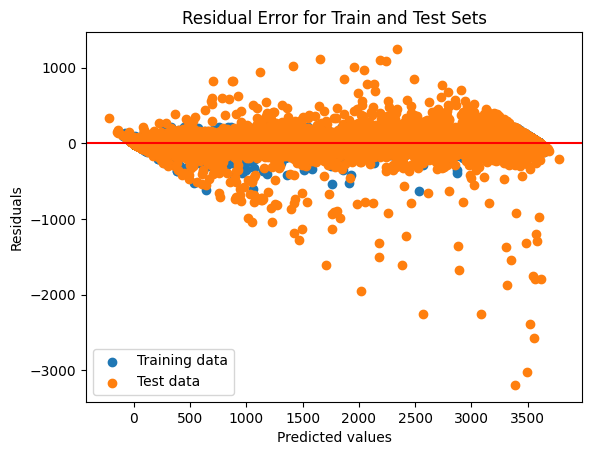

In [24]:
residual_train = ytrainGBR - ypredTrainGBR
residual_test = ytestGBR - y_predGBR

plt.scatter(ypredTrainGBR, residual_train, label='Training data')
plt.scatter(y_predGBR, residual_test, label='Test data')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Error for Train and Test Sets')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

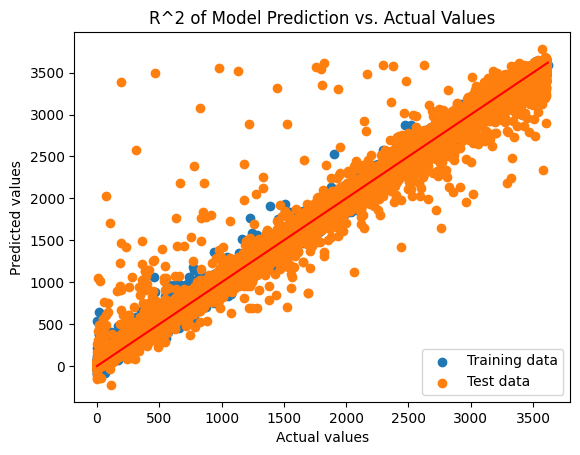

In [25]:
plt.scatter(ytrainGBR, ypredTrainGBR, label='Training data')
plt.scatter(ytestGBR, y_predGBR, label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('R^2 of Model Prediction vs. Actual Values')
plt.plot([ytrainGBR.min(), ytrainGBR.max()], [ytrainGBR.min(), ytrainGBR.max()], color='r')
plt.legend()
plt.show()

10. Creating our 3rd model using K Nearest Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is the matrix of input features and y is the vector of target values
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X, y, test_size=0.3, random_state=27)


knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_trainKNN, y_trainKNN)

KNeighborsRegressor()

In [27]:
y_predTEST = knn.predict(X_testKNN)
ypredTrainKNN = knn.predict(X_trainKNN)
mae_trainKNN = mean_absolute_error(y_trainKNN, ypredTrainKNN)
rmse_trainKNN = mean_squared_error(y_trainKNN, ypredTrainKNN, squared=False)

# Compute MAE and RMSE on the test set
mae_testKNN = mean_absolute_error(y_testKNN, y_predTEST)
rmse_testKNN = mean_squared_error(y_testKNN, y_predTEST, squared=False)

print("Training set MAE:", mae_trainKNN)
print("Training set RMSE:", rmse_trainKNN)
print("Test set MAE:", mae_testKNN)
print("Test set RMSE:", rmse_testKNN)

Training set MAE: 123.33371050713146
Training set RMSE: 198.71466409624796
Test set MAE: 161.17310158007464
Test set RMSE: 258.42958966854894


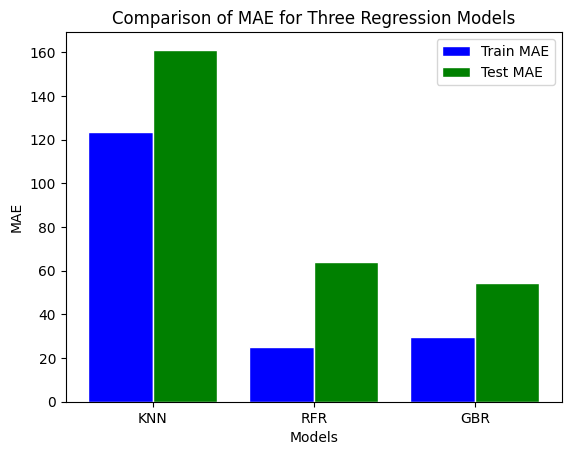

In [28]:
import numpy as np

# Define the data
train_mae = [mae_trainKNN, mae_train, mae_trainGBR] # Train MAE values for each model
test_mae = [mae_testKNN, mae_test, mae_testGBR] # Test MAE values for each model
models = ['KNN', 'RFR', 'GBR'] # Labels for each model

# Set the position of the bars on the x-axis
bar_width = 0.4
r1 = np.arange(len(train_mae))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, train_mae, color='blue', width=bar_width, edgecolor='white', label='Train MAE')
plt.bar(r2, test_mae, color='green', width=bar_width, edgecolor='white', label='Test MAE')

# Add x-axis labels and a title
plt.xlabel('Models')
plt.xticks([r + bar_width/2 for r in range(len(train_mae))], models)
plt.ylabel('MAE')
plt.title('Comparison of MAE for Three Regression Models')

# Add a legend
plt.legend()

# Show the chart
plt.show()

9. (a) Which of your implemented regressor models performed the best? With which feature
space? According to which performance metrics?

The best regressor model that we chose was Gradient Boosting Regressor. The features that we used were WindSpeed, WindDirection, Month, Hour, Minute, and Second. While minute and second aren't the most useful, we did see some difference in MAE and RMSE values. 

(b) What agrees better with the measured power—the theoretical power or the predicted power
via your best trained ML model?

In [29]:
theoretical_power = df["TheoreticalPower"]
theoretical_power_error = abs(y - theoretical_power)

# Compute the error between the measured power and the predicted power via the best trained ML model
predicted_power_error = abs(y - y_predGBR)

# Compare the errors and determine which one agrees better with the measured power
if np.mean(predicted_power_error) < np.mean(theoretical_power_error):
    print("The predicted power via the best trained ML model agrees better with the measured power.")
else:
    print("The theoretical power agrees better with the measured power.")

ValueError: operands could not be broadcast together with shapes (45182,) (13555,) 